<a href="https://colab.research.google.com/github/a-pujahari/EVA7/blob/main/Session10/COCO_Analysis/COCO_Annotation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COCO Annotation Analysis

COCO stands for Common Objects in COntext - microsoft's dataset for object detection. The dataset's popularity has made the annotation format used extremely popular and a go-to choice for object detection tasks.



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


## Download COCO Dataset

In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip 'annotations_trainval2017.zip'

--2021-12-13 15:17:46--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.69.60
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.69.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.2MB/s    in 2.5s    

2021-12-13 15:17:49 (96.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


## Read and Open COCO JSON File

In [3]:
filestream = open('/content/annotations/instances_train2017.json')
annotation_data = json.load(filestream)
print(annotation_data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [30]:
print(annotation_data['annotations'][2])

{'segmentation': [[274.58, 405.68, 298.32, 405.68, 302.45, 402.58, 333.42, 404.65, 356.13, 397.42, 386.06, 386.06, 398.45, 367.48, 399.48, 356.13, 392.26, 347.87, 382.97, 350.97, 339.61, 357.16, 283.87, 365.42, 269.42, 367.48, 243.61, 362.32, 239.48, 368.52, 241.55, 374.71, 253.94, 381.94, 267.35, 385.03, 271.48, 394.32, 271.48, 399.48, 272.52, 400.52, 281.81, 404.65]], 'area': 5607.661349999996, 'iscrowd': 0, 'image_id': 200365, 'bbox': [239.48, 347.87, 160.0, 57.81], 'category_id': 58, 'id': 603}


In [20]:
annotation_data['annotations'][0]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [11]:
print("Total number of images in the dataset is: " + str(len(annotation_data['images'])))
print("Total number of annotated boxes in the dataset is: " + str(len(annotation_data['annotations'])))
print("Total number of categories/classes in the dataset is: " + str(len(annotation_data['categories'])))


Total number of images in the dataset is: 118287
Total number of annotated boxes in the dataset is: 860001
Total number of categories/classes in the dataset is: 80


## Class-wise Average Area Distribution

In [37]:
category_map = {}
for cat in annotation_data['categories']:
  cat_id = cat['id']
  cat_name = cat['name']

  category_map[cat_id] = cat_name
  

In [38]:
bbox_areas = {}

for ann in annotation_data['annotations']:
    area = ann['area']
    cat_id = ann['category_id']
    cat_name = category_map[cat_id]
    if area <= 0.0:
        continue
    
    if cat_name in bbox_areas.keys():
        bbox_areas[cat_name].append(area)
    else:
        bbox_areas[cat_name] = [area]


bbox_avg_areas = []

for cat in bbox_areas.keys():
    areas = bbox_areas[cat]
    avg_area = int(sum(areas)/len(areas))
    
    bbox_avg_areas.append((cat,avg_area))

bbox_avg_areas = sorted(bbox_avg_areas, key = lambda x: x[1])

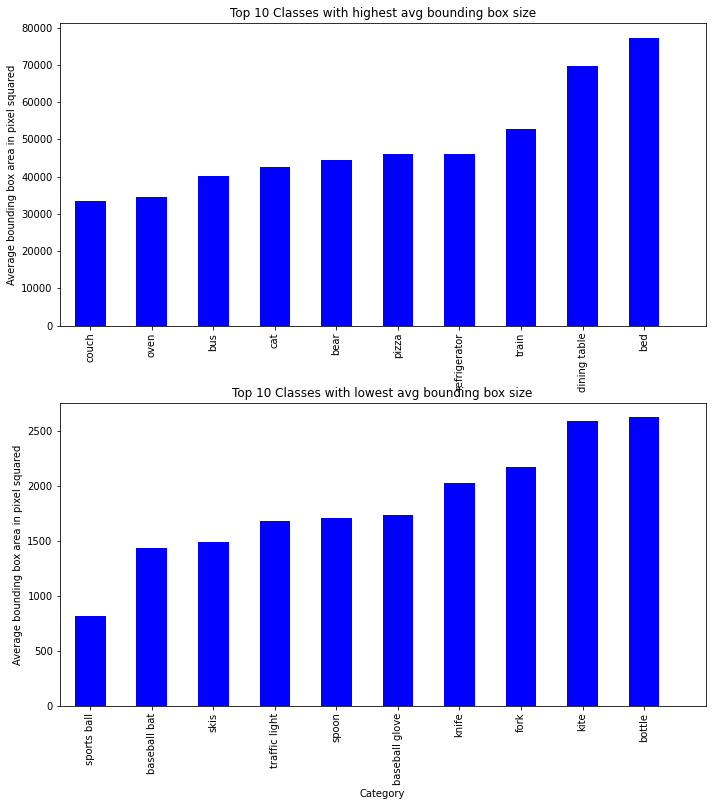

In [75]:
top = min(10, len(bbox_avg_areas))

plt.figure(figsize=(10,10))

y = [item[1] for item in bbox_avg_areas[-top:]]
x = [item[0] for item in bbox_avg_areas[-top:]]

y2 = [item[1] for item in bbox_avg_areas[:top]]
x2 = [item[0] for item in bbox_avg_areas[:top]]

plt.subplot(211)
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='blue')
plt.xlim(-0.5,len(y))
plt.xticks(rotation=90) 
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with highest avg bounding box size')
plt.tight_layout()


plt.subplot(212)
plt.bar(np.arange(len(y2)),y2, width=0.5,tick_label=x2,color='blue')
plt.xlim(-0.5,len(y2))
plt.xlabel('Category')
plt.xticks(rotation=90) 
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with lowest avg bounding box size')
plt.show()

## Category Wise Distribution

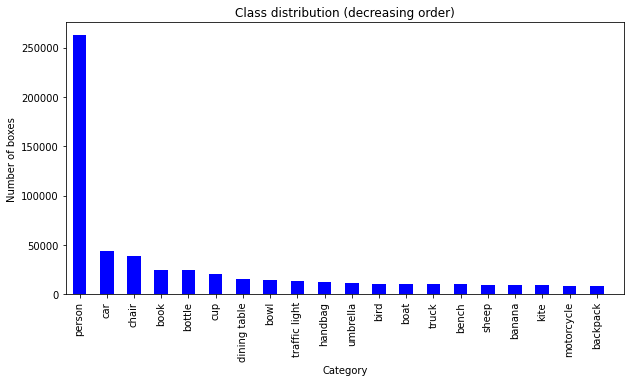

In [74]:
# Class distribution
class2nboxes = {} 

for ann in annotation_data['annotations']:
    cat_id = ann['category_id']
    cat_name = category_map[cat_id]
    
    if cat_name in class2nboxes.keys():
        class2nboxes[cat_name] += 1
    else:
        class2nboxes[cat_name] = 1

sorted_c2nb = [(k,v)for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])]

# top 20 classes
top = min(len(sorted_c2nb),20)

# to plot
y = [i[1] for i in sorted_c2nb[:top]]
x = [i[0] for i in sorted_c2nb[:top]]

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='blue')
plt.xticks(rotation=90) 
plt.xlim(-0.5,len(y))
plt.xlabel('Category')
plt.ylabel('Number of boxes')
plt.title('Class distribution (decreasing order)')
plt.show()

## K-Means Clustering - Data Prep

### Create dataframes from Image and Annotation Data

In [42]:
images_df = pd.DataFrame(annotation_data['images'], columns = annotation_data['images'][0].keys())
annotations_df = pd.DataFrame(annotation_data['annotations'], columns = annotation_data['annotations'][0].keys())

In [44]:
annotation_map_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
box_df = pd.DataFrame(annotation_map_df['bbox'].values.tolist(), columns =['x', 'y', 'box_width', 'box_height'])
annotation_map_df = pd.concat([annotation_map_df, box_df], 1)
annotation_map_df = annotation_map_df.drop('bbox', axis =1)

In [45]:
annotation_map_df

,file_name,width,height,x,y,box_width,box_height
0,000000391895.jpg,640.0,360.0,199.84,200.46,77.71,70.88
1,000000522418.jpg,640.0,480.0,234.22,317.11,149.39,38.55
2,000000184613.jpg,500.0,336.0,239.48,347.87,160.00,57.81
3,000000318219.jpg,556.0,640.0,296.65,388.33,1.03,0.00
4,000000554625.jpg,426.0,640.0,251.87,333.42,125.94,22.71
...,...,...,...,...,...,...,...
859996,NaN,NaN,NaN,40.00,104.00,394.00,43.00
859997,NaN,NaN,NaN,137.00,195.00,140.00,138.00
859998,NaN,NaN,NaN,476.00,200.00,153.00,85.00
859999,NaN,NaN,NaN,275.00,207.00,153.00,148.00


### Clean Up Data Frame

In [46]:
annotation_map_df = annotation_map_df.dropna() 
annotation_map_df.isnull().any()

file_name     False
width         False
height        False
x             False
y             False
box_width     False
box_height    False
dtype: bool

### Covert to numpy array

In [47]:
size_array = annotation_map_df[["box_width", "box_height"]].to_numpy()

### Scale Data

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_size = scaler.fit_transform(size_array)
scaled_size

array([[0.12048739, 0.11075   ],
       [0.23260652, 0.06023437],
       [0.24920228, 0.09032813],
       ...,
       [0.03810298, 0.03459375],
       [0.01079272, 0.01135937],
       [0.01049553, 0.01235938]])

### Using the Elbow method to find ideal cluster size

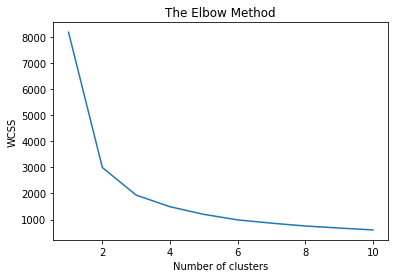

In [51]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_size)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



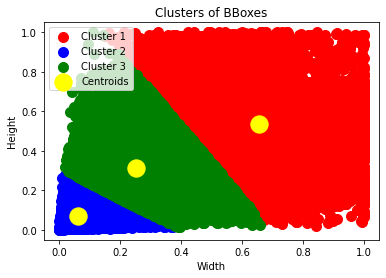

In [55]:
# Training the K-Means model on the dataset - Elbow method suggests ideal number of clusters is 2/3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_size)

# Visualising the clusters
plt.scatter(scaled_size[y_kmeans == 0, 0], scaled_size[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_size[y_kmeans == 1, 0], scaled_size[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_size[y_kmeans == 2, 0], scaled_size[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(scaled_size[y_kmeans == 3, 0], scaled_size[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(scaled_size[y_kmeans == 4, 0], scaled_size[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of BBoxes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()

## Visualize Anchor Boxes

In [62]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

def plot_anchor_boxes(cluster_centers):
    
    xdata = np.array([0.5]*len(cluster_centers))
    ydata = np.array([0.5]*len(cluster_centers))

    xerror = np.array([list(np.exp(cluster_centers[:, 0])/2)]*2)
    yerror = np.array([list(np.exp(cluster_centers[:, 1])/2)]*2)

    errorboxes = []

    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    pc = PatchCollection(errorboxes, facecolor='None', alpha=1, edgecolor='r')
    fig, ax = plt.subplots(1)

    ax.add_collection(pc)
    plt.title(f'Anchor Boxes for k = {len(cluster_centers)}')
    artists = plt.errorbar(xdata, ydata, xerr=xerror, yerr=yerror, fmt='None', ecolor='None')

### Anchor Boxes for K = 3

In [65]:
print("Anchor Box sizes for k = 3")
scaler.inverse_transform(kmeans.cluster_centers_)

Anchor Box sizes for k = 3


array([[420.63273697, 342.77386242],
       [ 40.12158212,  45.9242354 ],
       [162.22108573, 200.33519492]])

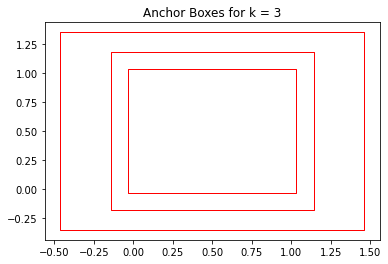

In [64]:
plot_anchor_boxes(kmeans.cluster_centers_)

### Anchor Boxes for K = 4

In [66]:
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_4 = kmeans_4.fit_predict(scaled_size)

print("Anchor Box sizes for k = 4")
scaler.inverse_transform(kmeans_4.cluster_centers_)

Anchor Box sizes for k = 4


array([[ 34.27854891,  40.39933991],
       [477.2604025 , 304.7007009 ],
       [138.50565154, 147.21014923],
       [223.09239973, 352.64520942]])

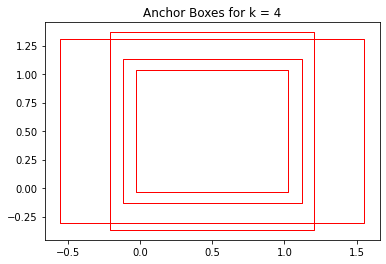

In [67]:
plot_anchor_boxes(kmeans_4.cluster_centers_)

### Anchor Boxes for K = 5

In [70]:
kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans_5.fit_predict(scaled_size)

print("Anchor Box sizes for k = 5")
scaler.inverse_transform(kmeans_5.cluster_centers_)

Anchor Box sizes for k = 5


array([[ 31.46690942,  36.07103242],
       [497.09549117, 360.93543234],
       [196.21753732, 355.47847698],
       [298.63960473, 174.26306106],
       [105.85647764, 133.41405479]])

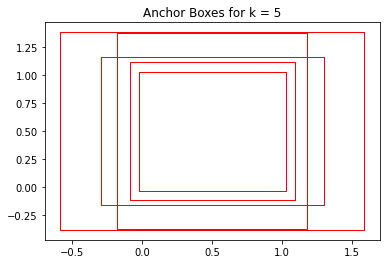

In [71]:
plot_anchor_boxes(kmeans_5.cluster_centers_)

### Anchor Boxes for K = 6

In [72]:
kmeans_6 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans_6 = kmeans_6.fit_predict(scaled_size)

print("Anchor Box sizes for k = 6")
scaler.inverse_transform(kmeans_6.cluster_centers_)

Anchor Box sizes for k = 6


array([[ 27.98809681,  33.0186375 ],
       [526.86385673, 314.08632069],
       [136.91996906, 263.36900875],
       [286.9179663 , 171.53709248],
       [299.71864806, 437.78176292],
       [ 95.5648596 , 106.88031943]])

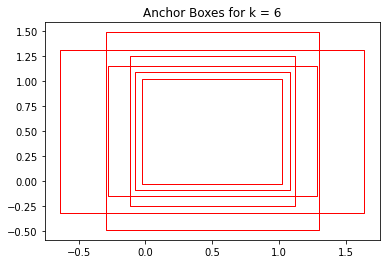

In [73]:
plot_anchor_boxes(kmeans_6.cluster_centers_)